In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as pl

In [21]:
def shc(im):
    # The important part - Correct BGR to RGB channel
#     im_ = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    pl.figure(figsize = (30,30))
    pl.imshow(im)
    
def sh(im):
    pl.figure(figsize = (15,15))
    pl.imshow(im, cmap='gray')

In [4]:
img = cv2.imread('../data/own/Portulaca_flower_Counting/IMG_20190719_090152.jpg')
# img = cv2.GaussianBlur(img,(7,7),0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Binary Thresholdong

In [7]:
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [8]:
# sh(thresh)

## Color Thresholding

In [9]:
## define the list of boundaries
yellow = ([0, 200, 200], [100, 255, 255])
pink = ([80, 0, 150], [130, 100, 255])

In [10]:
def color_threshold(image, xx):
    lower, upper = xx
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output

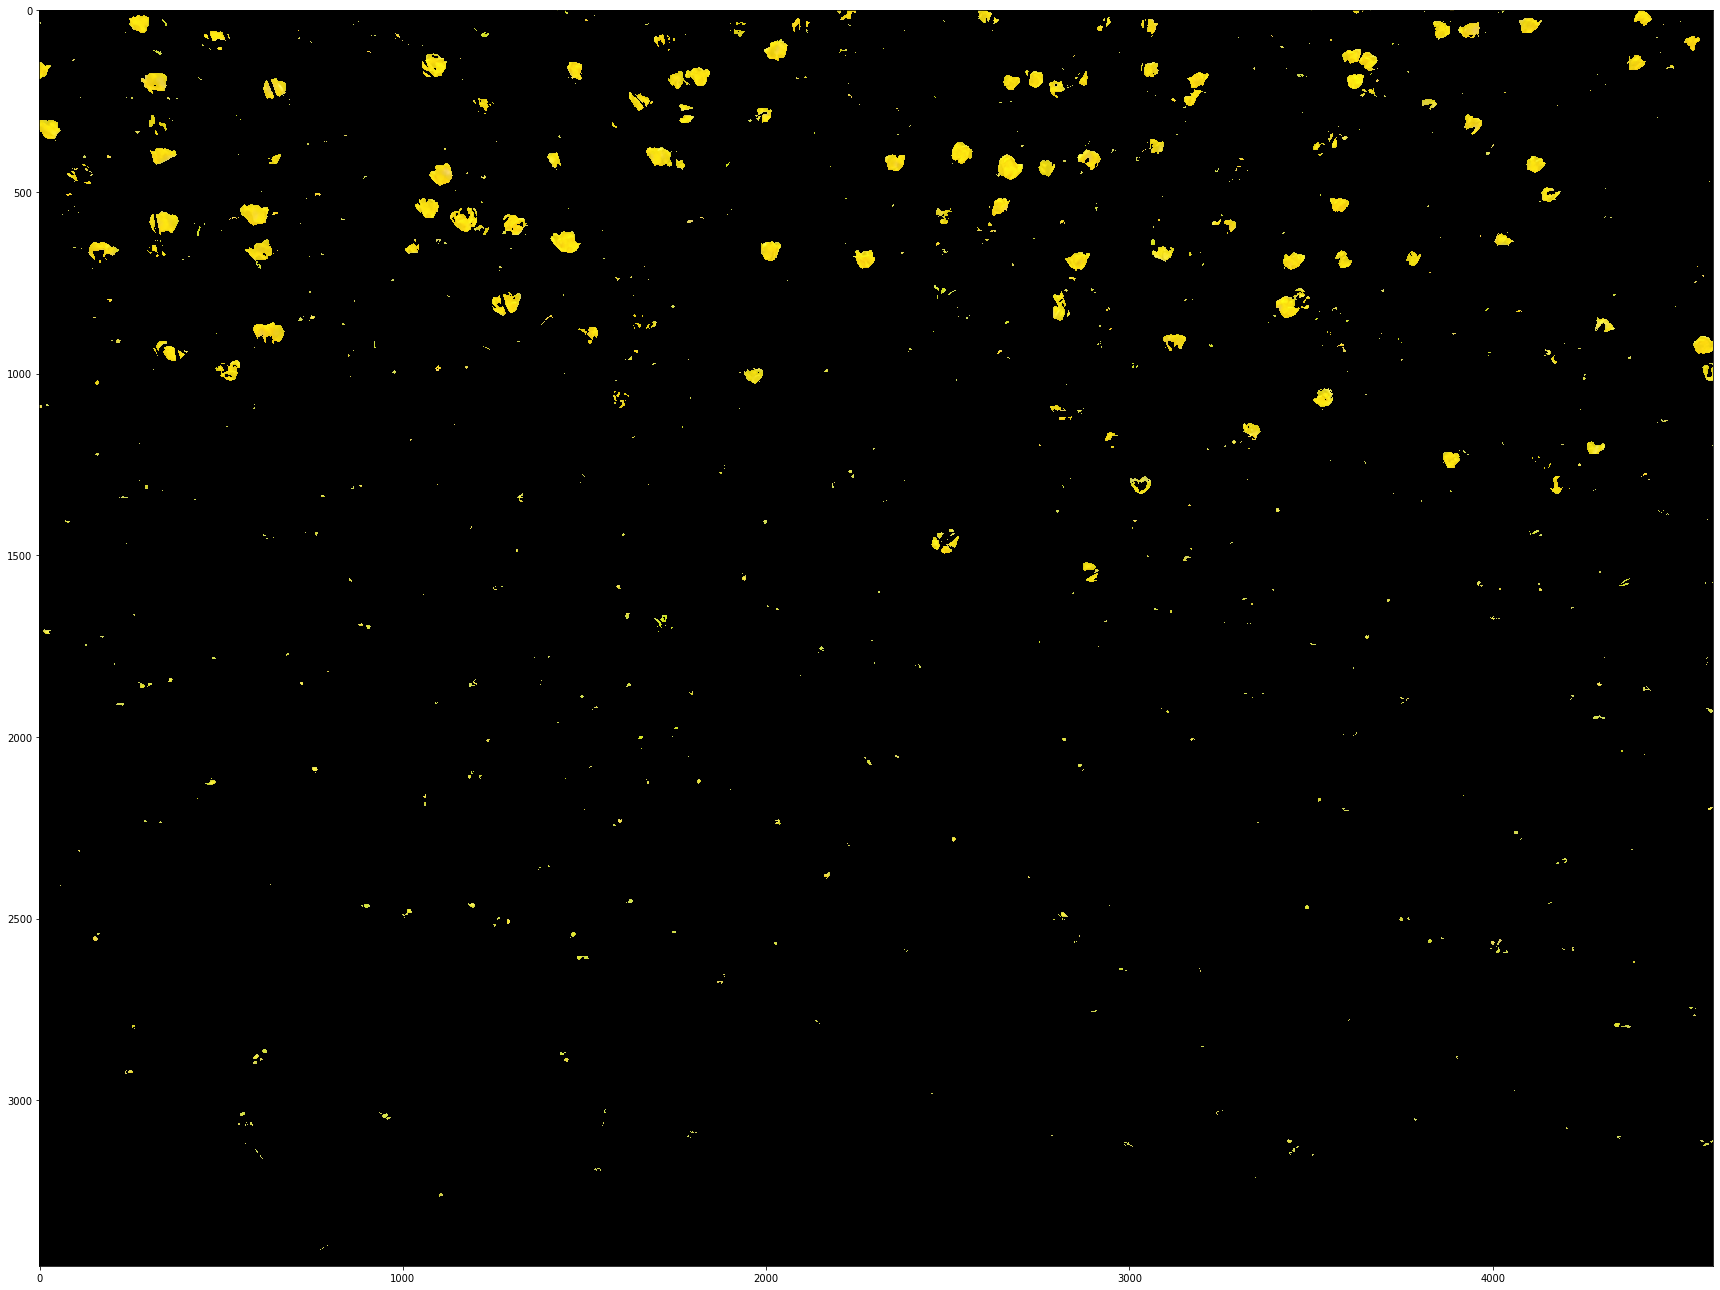

In [14]:
out = color_threshold(img, yellow)
shc(out)

In [29]:
gray = cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,10,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

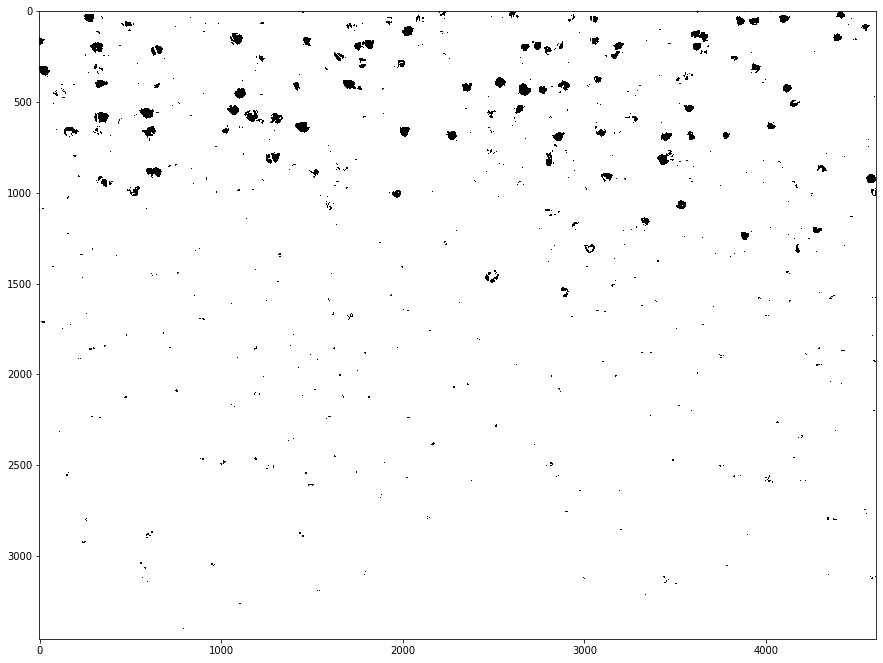

In [30]:
sh(thresh)

In [31]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 10)

In [32]:
# sh(opening)

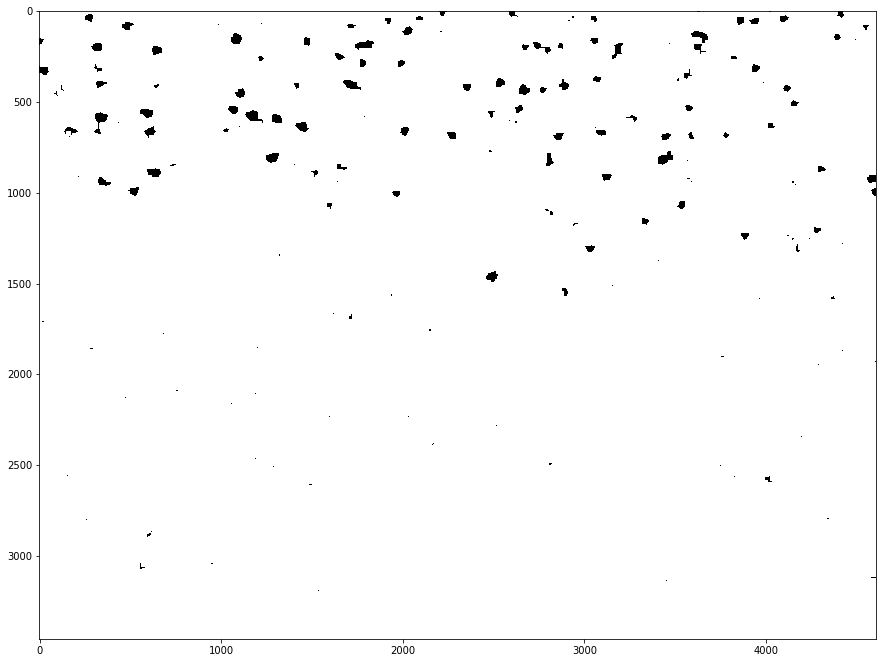

In [33]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# sure_bg = cv2.erode(sure_bg,kernel,iterations=1)
sh(sure_bg)

In [34]:
image, contours, hierarchy = cv2.findContours(sure_bg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [35]:
img_counters = cv2.drawContours(img, contours, -1, (0,0,255), 10)

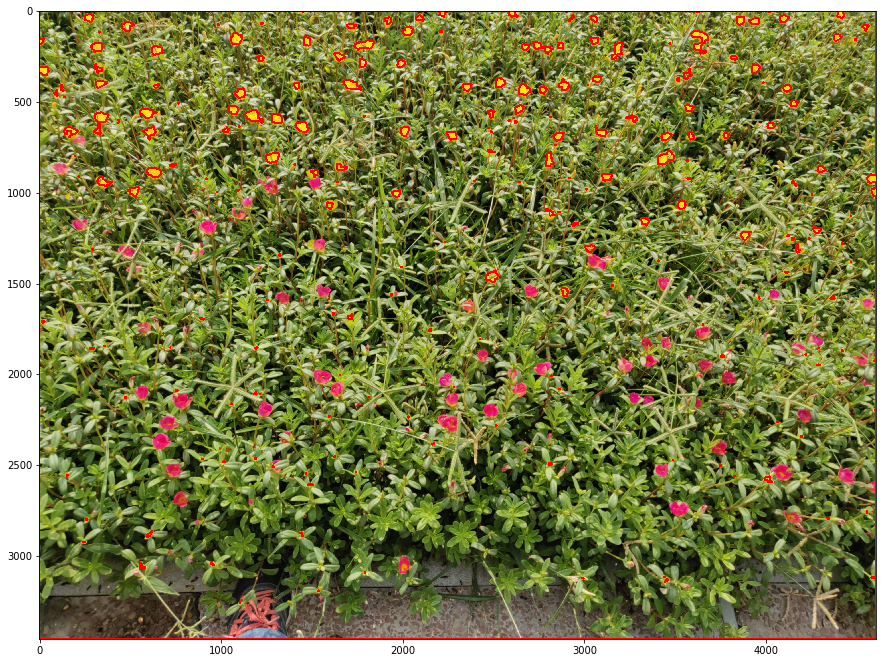

In [36]:
shc(img_counters)

# kmeans clustering

In [5]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
vectorized = np.float32(img.reshape((-1,3)))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [26]:
K = 6
attempts=10
ret,label,center=cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [27]:
center

array([[ 29.005363,  34.677032,   8.445413],
       [153.75471 , 154.05002 ,  88.526665],
       [114.49267 , 122.78873 ,  47.818287],
       [ 71.63842 ,  81.28739 ,  26.10559 ],
       [196.9787  , 193.94409 ,  41.489124],
       [193.58655 , 198.22647 , 139.77287 ]], dtype=float32)

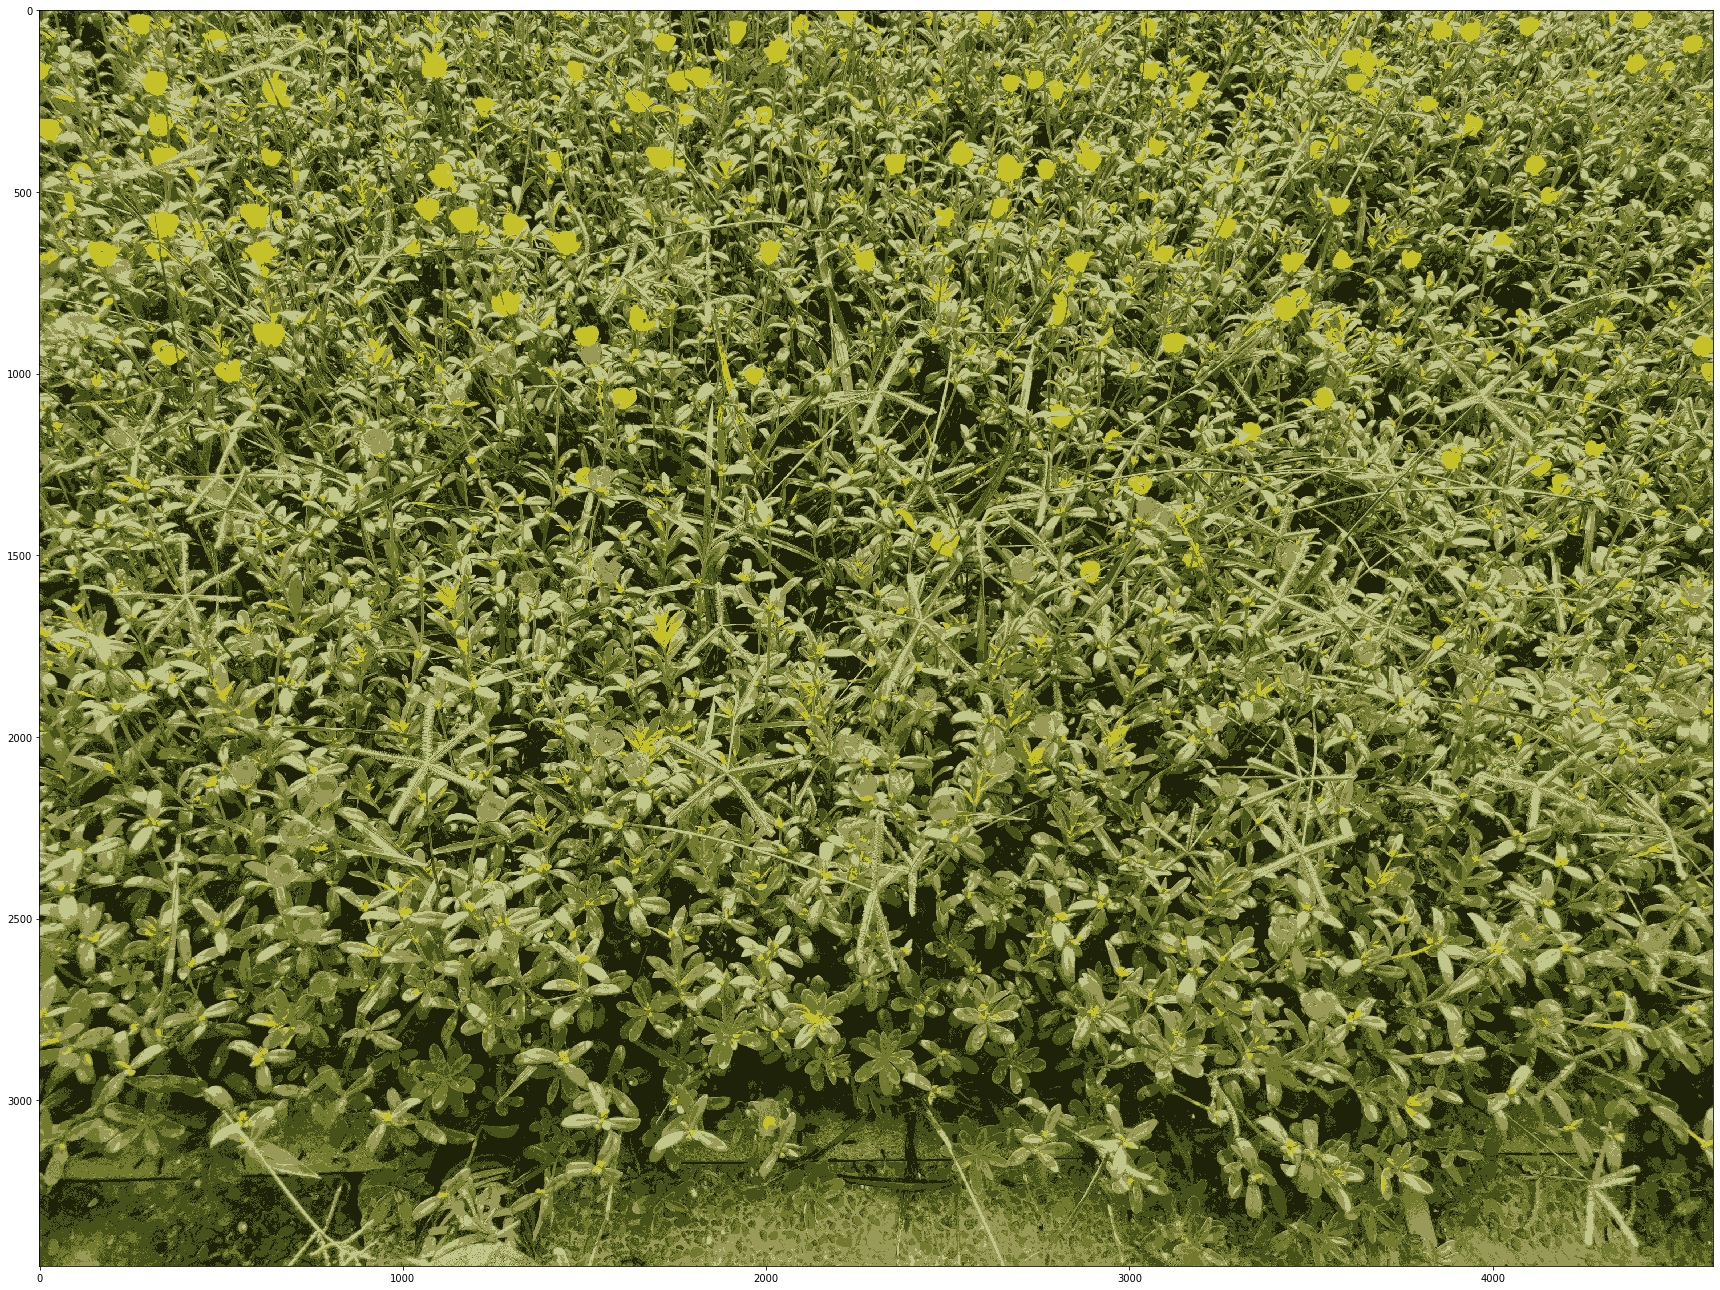

In [28]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
shc(result_image)